# WHO national life expectancy - Modelization

## Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import dataset

In [2]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Feature pre-selection based on EDA results

### Missing values pre-selection

In [8]:
miss_coeff = 0.8

In [9]:
df_missing = df.isna().sum() / df.shape[0]
df_prep = df[df.columns[df_missing < miss_coeff]]
df_prep.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN


### Columns pre-selection

In [10]:
health_dict = {
    'sanitary': ['basic_water'],
    'physical_shape': ['bmi', 'age5-19thinness', 'age5-19obesity'],
    'health_coverage': ['measles', 'polio', 'diphtheria'],
    'gov_investments': ['gghe-d', 'che_gdp']
}

In [11]:
mortality_cols = ['adult_mortality', 'infant_mort', 'age1-4mort']
std_life_cols = ['une_poverty', 'une_gni', 'gni_capita']
edu_cols = ['une_school', 'une_edu_spend']

health_cols = []
for k,v in health_dict.items():
    health_cols.extend(v)

geo_cols = ['region', 'country']
target = 'une_life'
cat_target = 'life_exp_cat'
enc_cols = geo_cols + [cat_target]

In [12]:
df_prep = df_prep[geo_cols + mortality_cols + std_life_cols + edu_cols + health_cols + [target]]
df_prep.head()

,region,country,adult_mortality,infant_mort,age1-4mort,une_poverty,une_gni,gni_capita,une_school,une_edu_spend,basic_water,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,gghe-d,che_gdp,une_life
0,Africa,Angola,383.5583,0.137985,0.025695,32.3,2530.0,2190.0,NaN,2.60753,41.14431,21.7,11.0,0.5,32.0,21.0,31.0,1.11099,1.90860,46.522
1,Africa,Angola,372.3876,0.133675,0.024500,NaN,2630.0,2290.0,NaN,NaN,42.25467,21.8,10.9,0.5,60.0,28.0,42.0,2.04631,4.48352,47.059
2,Africa,Angola,354.5147,0.128320,0.023260,NaN,3180.0,2690.0,NaN,NaN,43.37680,21.9,10.7,0.6,59.0,22.0,47.0,1.30863,3.32946,47.702
3,Africa,Angola,343.2169,0.122040,0.021925,NaN,3260.0,2820.0,NaN,NaN,44.36387,22.0,10.5,0.7,44.0,21.0,46.0,1.46560,3.54797,48.440
4,Africa,Angola,333.8711,0.115700,0.020545,NaN,3560.0,3080.0,NaN,NaN,45.35134,22.2,10.3,0.8,43.0,18.0,47.0,1.68663,3.96720,49.263


## Prototyping

### Preprocessing

#### Feature engineering : categorize target col

In [13]:
def categorize_target(life_exp: float) -> str:
    
    if life_exp < 50:
        return 'under 50'
    
    elif 50 <= life_exp <= 60:
        return '50-60'
    
    elif 60 < life_exp <= 70:
        return '60-70'
    
    elif 70 < life_exp <= 80:
        return '70-80'
    
    else:
        return 'above 80'

In [59]:
def feature_engineering(df_: pd.DataFrame) -> pd.DataFrame:
    df_[cat_target] = df_[target].apply(categorize_target)
    return df_.drop(target, axis=1)

#### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

def scaling(df_: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    return scaler.fit_transform(df_[cols])

#### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()

def encoding(df_: pd.DataFrame, col: str) -> np.array:
    return encoder.fit_transform(df_[col])

#### Imputation

In [64]:
def imputation(df_: pd.DataFrame) -> pd.DataFrame:
    
    for col in df_.columns[df_.isnull().any(axis=0)]:
        df_[col].fillna(df_[col].mean(), inplace=True)
        
    return df_

#### Main preprocessing

In [65]:
def preprocessing(df_: pd.DataFrame, encode_cols: list, target_col: str):

    # Feature engineering
    df_ = feature_engineering(df_)
    
    # Scaling
    to_scale = df_.select_dtypes(exclude=['object']).columns
    df_[to_scale] = scaling(df_, cols=to_scale)

    # Encoding
    for col in encode_cols:
        df_[col] = encoding(df_, col)

    # Imputation
    df_ = imputation(df_)

    X = df_.drop(target_col, axis=1)
    y = df_[target_col]

    print(f'X shape {X.shape} | Y shape {y.shape}')
    print(f'{y.value_counts()}')

    return X, y


#### Train-test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
rd_state = 2    # gives a better classes repartition between train/test
t_size = 0.2

In [20]:
train_set, test_set = train_test_split(df_prep, test_size=t_size, random_state=rd_state)

In [69]:
X_train, y_train = preprocessing(train_set, encode_cols=enc_cols, target_col=cat_target)

X shape (2488, 19) | Y shape (2488,)
2    1183
1     587
0     389
3     233
4      96
Name: life_exp_cat, dtype: int64


In [70]:
X_test, y_test = preprocessing(test_set, encode_cols=enc_cols, target_col=cat_target)

X shape (623, 19) | Y shape (623,)
2    290
1    160
0     95
3     51
4     27
Name: life_exp_cat, dtype: int64


In [71]:
X_test.head()

,region,country,adult_mortality,infant_mort,age1-4mort,une_poverty,une_gni,gni_capita,une_school,une_edu_spend,basic_water,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,gghe-d,che_gdp
1031,1,104,-0.578428,-0.606191,-0.570712,1.567374e-17,0.169544,2.453679e-01,-3.204188e-16,2.727379e-01,0.674557,1.153713e+00,-8.423608e-01,1.655475e+00,0.824024,0.704392,0.693773,-0.059311,-0.104326
68,0,21,3.483362,0.740388,1.017195,1.567374e-17,-0.362714,-3.173895e-01,-3.204188e-16,1.509652e-16,-0.420433,-6.468921e-01,1.510323e+00,-9.703120e-01,0.385310,0.704392,0.693773,0.073694,-0.048951
677,0,64,0.417426,0.385799,0.342535,1.567374e-17,-0.629166,-3.617835e-18,-3.204188e-16,-6.324891e-02,-0.253980,-5.568619e-01,1.962113e-01,-8.797676e-01,0.447983,0.513401,0.756213,-0.796134,-0.807137
1606,2,151,0.439065,0.769496,0.784622,1.567374e-17,-0.685940,-6.446719e-01,-3.204188e-16,-1.316920e+00,-1.776991,-5.403804e-16,-1.149746e-16,4.455264e-17,-0.366770,-0.059569,0.006927,-0.650715,-0.226387
2808,5,57,0.175421,-0.439646,-0.507557,1.567374e-17,-0.496262,-4.239140e-01,-3.204188e-16,1.509652e-16,0.586221,6.585465e-01,-3.124771e-01,1.841289e-01,0.071943,0.577065,0.506451,-0.307685,-1.183941


### ML modelization - Classification prototype

This section is about testing some models and evaluation methods for classification made from initial target categories.  
A goal is also to get a first model, then work around it to make decent predictions.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
tree_model = DecisionTreeClassifier(random_state=rd_state)
rd_model = RandomForestClassifier(random_state=rd_state)
knn_model = KNeighborsClassifier(n_neighbors=5)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [312]:
def eval_model(model, X_train, y_train, X_test, y_test, **kwargs: dict):

    # Train model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Show results
    plt.figure(figsize=(9, 6))
    sns.heatmap(
        confusion_matrix(y_test, y_pred), square=True, annot=True, cbar=False, fmt='d'
    )
    print(classification_report(y_test, y_pred))

    # Cross-validation
    N, train_score, val_score = learning_curve(model, X_train, y_train, **kwargs)

    print(f'max validation score : {val_score.max()}')
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Training score')
    plt.plot(N, val_score.mean(axis=1), label='Cross validation score')
    plt.title(f'{type(model).__name__} cross validation, k_folds = {kwargs["cv"]}')
    plt.legend()

    


In [25]:
cv_params = {
    'cv': 5,
    'train_sizes': np.linspace(0.1, 1, 10),
    'scoring': 'f1_micro',      # better choice because of class imbalances
    'shuffle': True,
    'random_state': rd_state
}

#### RandomForest evalutation

In [26]:
eval_model(rd_model, X_train, y_train, X_test, y_test, **cv_params)

NameError: name 'X_train' is not defined

#### KNN evaluation

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        95
           1       0.80      0.74      0.77       160
           2       0.85      0.90      0.87       290
           3       0.85      0.76      0.80        51
           4       1.00      0.81      0.90        27

    accuracy                           0.84       623
   macro avg       0.87      0.82      0.84       623
weighted avg       0.84      0.84      0.84       623

max validation score : 0.8955823293172691


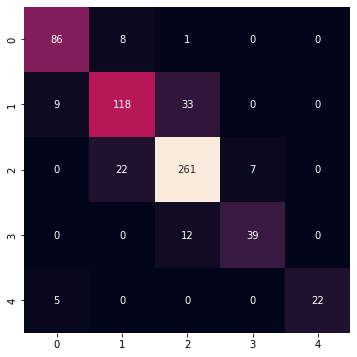

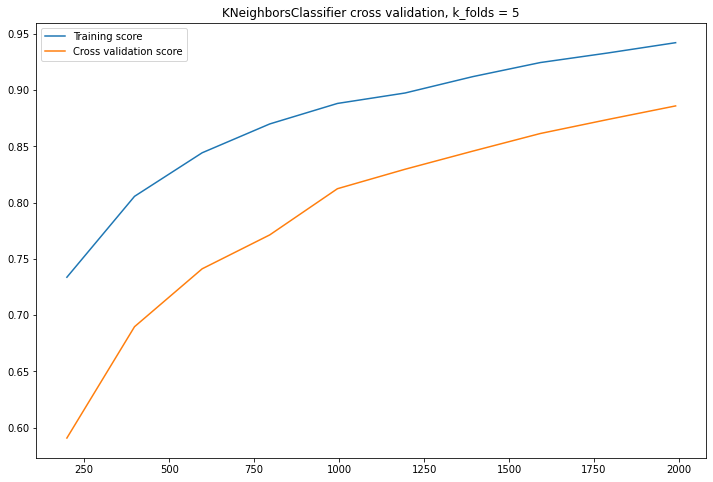

In [ ]:
eval_model(knn_model, X_train, y_train, X_test, y_test, **cv_params)

#### RandomForest optimization

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def optimizer(model, X: any, y: any, param_grid: dict, cv: int):
    
    # Create grid and fit
    grid = GridSearchCV(model, param_grid, cv=cv)
    grid.fit(X, y)
    
    # Print report
    print(f'Best params : {grid.best_params_}\n', f'Best score : {grid.best_score_}')
    
    return grid.best_estimator_

In [29]:
# Random Forest grid
rd_param_grid = {
    'n_estimators': np.arange(100, 120),
    'criterion': ['gini', 'entropy']
}

In [ ]:
best_rd_forest = optimizer(
    rd_model, X_train, y_train, rd_param_grid, cv=cv_params['cv']
)


Best params : {'criterion': 'entropy', 'n_estimators': 118}
 Best score : 0.9569949819398318


              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.95      0.91      0.93       160
           2       0.95      0.94      0.95       290
           3       0.78      1.00      0.88        51
           4       1.00      0.81      0.90        27

    accuracy                           0.93       623
   macro avg       0.92      0.92      0.92       623
weighted avg       0.94      0.93      0.93       623

max validation score : 0.9637826961770624


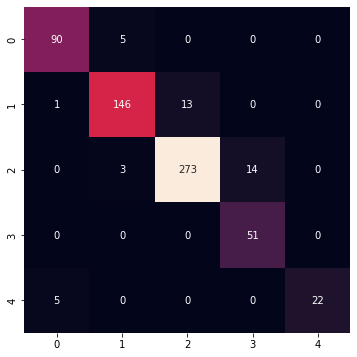

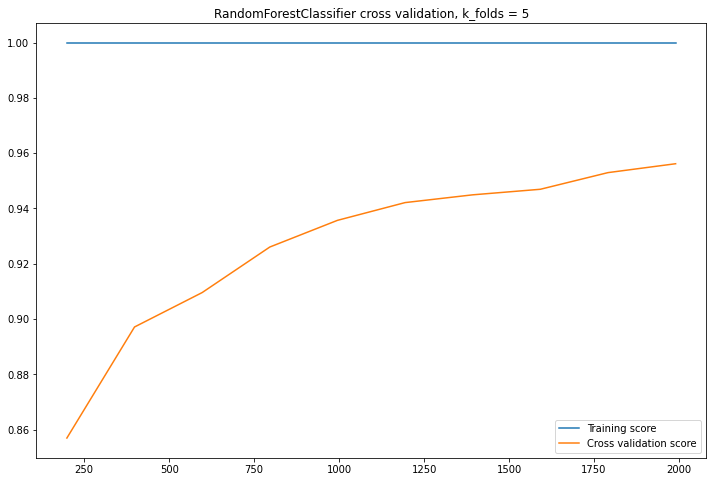

In [ ]:
eval_model(best_rd_forest, X_train, y_train, X_test, y_test, **cv_params)

#### KNN optimization

In [232]:
knn_param_grid = {
    'n_neighbors': np.arange(3, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
best_knn = optimizer(knn_model, X_train, y_train, knn_param_grid, cv=cv_params['cv'])

Best params : {'metric': 'manhattan', 'n_neighbors': 3}
 Best score : 0.9364871962699894


              precision    recall  f1-score   support

           0       0.92      0.87      0.90        95
           1       0.89      0.90      0.90       160
           2       0.94      0.95      0.94       290
           3       0.83      0.86      0.85        51
           4       0.96      0.89      0.92        27

    accuracy                           0.91       623
   macro avg       0.91      0.89      0.90       623
weighted avg       0.92      0.91      0.91       623

max validation score : 0.9538152610441767


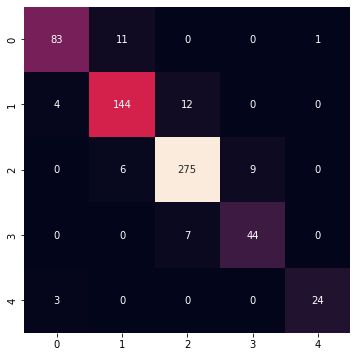

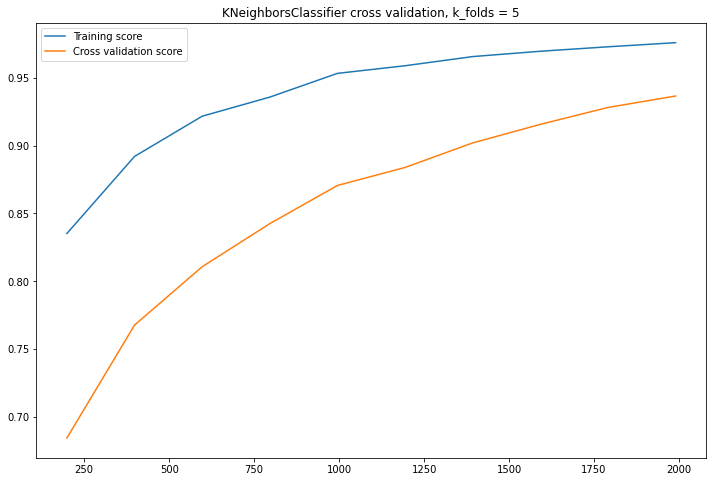

In [ ]:
eval_model(best_knn, X_train, y_train, X_test, y_test, **cv_params)

## Advanced preprocessing/modelization

In [283]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Custom transformers

In [241]:
class FeaturePreSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names: list[str]):
        self.feature_names = feature_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.loc[:, self.feature_names].copy(deep=True)

We have to encapsulate LabelEncoder in a custom class, because its fit_transform method only take 2 args (self, X) and not 3 (self, X, y) as the sklearn pipeline does.

In [242]:
def transform_y(y: pd.Series) -> np.ndarray:
    y_ = y.copy(deep=True)
    y_ = y.apply(categorize_target)
    y_ = LabelEncoder().fit_transform(y_)
    return y_
    

### Pipelines

#### Preprocessing

In [262]:
imput_strat = 'median'
cat_cols = geo_cols
num_cols = mortality_cols + std_life_cols + edu_cols + health_cols
pre_features = num_cols + cat_cols

In [277]:
def preprocess_model(model):
    
    num_transformer = make_pipeline(SimpleImputer(strategy=imput_strat), StandardScaler())
    cat_transformer = OneHotEncoder(handle_unknown='ignore')
    
    preprocessor = ColumnTransformer([
        ('numerical', num_transformer, num_cols),
        ('categorical', cat_transformer, cat_cols)
    ])
    
    return Pipeline([
        ('pre_select', FeaturePreSelector(feature_names=pre_features)),
        ('preprocess', preprocessor),
        ('clf', model)
    ])

#### Train/test

In [278]:
train_set2, test_set2 = train_test_split(df, test_size=t_size, random_state=rd_state)

In [279]:
X_train2, y_train2 = train_set2.drop(target, axis=1), transform_y(train_set2[target])
X_test2, y_test2 = test_set2.drop(target, axis=1), transform_y(test_set2[target])

#### Results

In [280]:
model = preprocess_model(KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
model.fit(X_train2, y_train2)

Pipeline(steps=[('pre_select',
                 FeaturePreSelector(feature_names=['adult_mortality',
                                                   'infant_mort', 'age1-4mort',
                                                   'une_poverty', 'une_gni',
                                                   'gni_capita', 'une_school',
                                                   'une_edu_spend',
                                                   'basic_water', 'bmi',
                                                   'age5-19thinness',
                                                   'age5-19obesity', 'measles',
                                                   'polio', 'diphtheria',
                                                   'gghe-d', 'che_gdp',
                                                   'region', 'country'])),
                ('preprocess',
                 ColumnTransformer(transformers=[('...
                                                  ['adult_mortali

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.91      0.91      0.91       160
           2       0.94      0.98      0.96       290
           3       1.00      0.80      0.89        51
           4       0.96      0.85      0.90        27

    accuracy                           0.93       623
   macro avg       0.94      0.89      0.91       623
weighted avg       0.93      0.93      0.93       623

max validation score : 0.9377510040160643


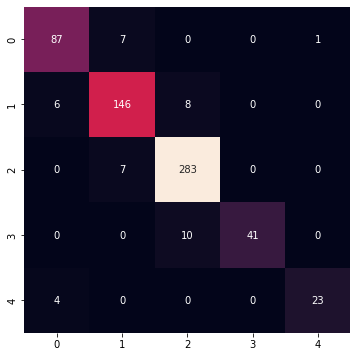

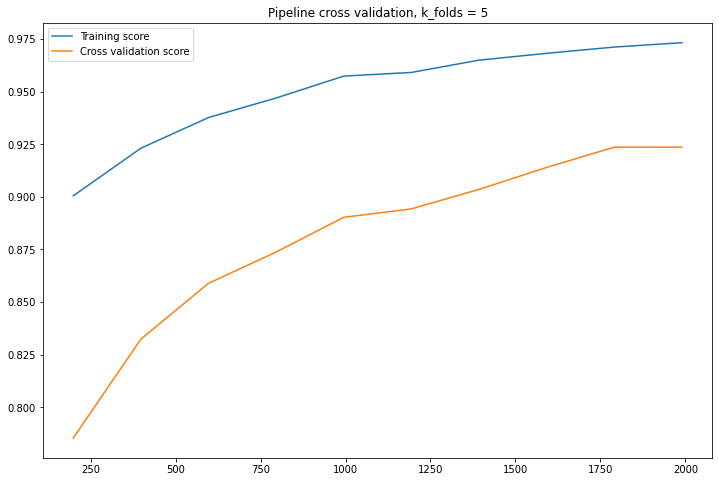

In [281]:
eval_model(model, X_train2, y_train2, X_test2, y_test2, **cv_params)

#### Optimization

In [316]:
from sklearn.model_selection import RandomizedSearchCV

In [325]:
n = 54   # number of iteration in the grid search
param_grid = {
    'clf__n_neighbors': np.arange(2, 20),
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [326]:
grid = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=n,
    scoring=cv_params['scoring'],     # better because of class imbalances
    cv=cv_params['cv']
)
grid.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_select',
                                              FeaturePreSelector(feature_names=['adult_mortality',
                                                                                'infant_mort',
                                                                                'age1-4mort',
                                                                                'une_poverty',
                                                                                'une_gni',
                                                                                'gni_capita',
                                                                                'une_school',
                                                                                'une_edu_spend',
                                                                                'basic_water',
                                                             

In [327]:
grid.best_params_

{'clf__n_neighbors': 2, 'clf__metric': 'manhattan'}

In [328]:
grid.best_score_

0.9256389744087011

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        95
           1       0.90      0.91      0.90       160
           2       0.94      0.95      0.95       290
           3       1.00      0.73      0.84        51
           4       1.00      0.74      0.85        27

    accuracy                           0.91       623
   macro avg       0.93      0.86      0.89       623
weighted avg       0.92      0.91      0.91       623

max validation score : 0.9497991967871486


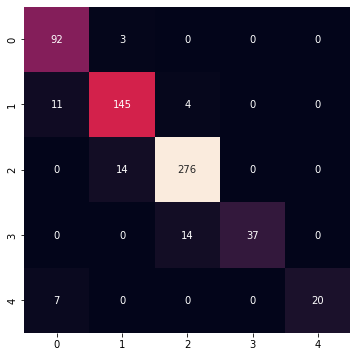

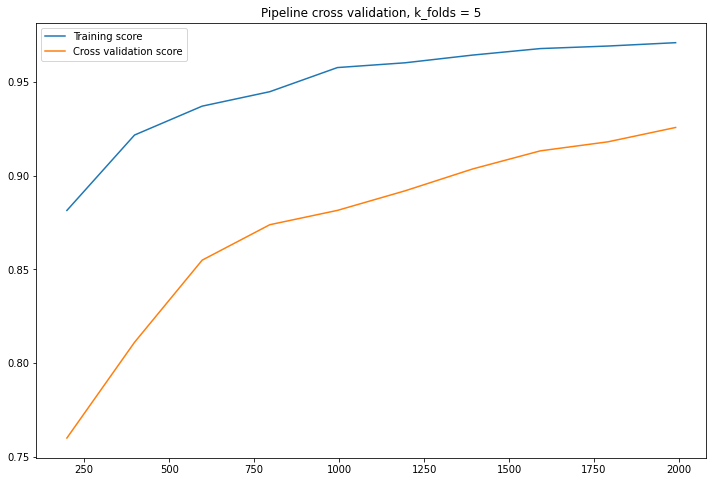

In [329]:
eval_model(grid.best_estimator_, X_train2, y_train2, X_test2, y_test2, **cv_params)